## Day 1

## 1.- Structural understanding of the model

Objective: Identify variables and their role in the model equation.

👉 Question to answer with practice:

What is the model equation and what does each term represent?

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('.\mlr_sales.csv')
df.head

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Carlos\AppData\Local\Temp\ipykernel_572\1234020642.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('.\mlr_sales.csv')


<bound method NDFrame.head of      Weekly_Sales  TV_Spend  Radio_Spend  Social_Spend  Price_Index  \
0          200.32    229.80        88.94        105.99        1.076   
1          164.36    191.70        94.02        103.03        0.908   
2          238.07    238.86       107.08        143.42        1.087   
3          228.77    291.38       106.35        175.77        1.136   
4          190.47    185.95        45.56        102.57        1.041   
..            ...       ...          ...           ...          ...   
195        223.13    223.12        68.27        123.67        1.105   
196        139.27    146.97        37.17         82.78        0.996   
197        205.90    209.22       113.85        105.96        1.068   
198        200.55    203.49        77.14        113.21        1.003   
199        178.09    131.42       110.95         86.40        1.003   

     Competitor_Price  Web_Traffic  Promo  Season  
0               1.125        70.99      0    Fall  
1            

In [6]:
#We select the dependent and independent values
#In this specific case, we already know what the possible independent variables are
y = df['Weekly_Sales']
X = df[['TV_Spend','Radio_Spend','Price_Index','Competitor_Price','Web_Traffic','Promo']]



X= sm.add_constant(X)

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     18.42
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           7.05e-17
Time:                        11:25:26   Log-Likelihood:                -1033.4
No. Observations:                 200   AIC:                             2081.
Df Residuals:                     193   BIC:                             2104.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -27.5657     36.005  

Interpret in plain text:

### What does the intercept (β₀) mean?
It means that if all the variables influencing our dependent variable were equal to 0, sales would be -27.5

### Which variable has the greatest positive effect on sales?
Price Index

### Which variable has a negative effect?
None

## 2.- Interpretation of coefficients

Objective: To understand how to interpret βᵢ.

👉 Related question: What does each βᵢ represent, and how are its sign and magnitude interpreted?

* Based on the results, you can see how every time prices go up, more sales are made, which is a bit illogical, but the data is random.

## 3.- Model Evaluation (R² and MSE)

Objective: Connect theory with basic metrics.

👉 Related Question:

What do R², Adjusted R², and MSE measure?

* R² measures what proportion of the total variability in sales (Weekly_Sales) is explained by the model.
* It penalizes the model when irrelevant variables are added (which only inflate the R² without improving the model).
* It measures the average squared error between the actual and predicted values.

The closer R² and Adjusted R² are to each other, the more consistent the model is. If R² increases but the adjusted R² decreases, you added useless variables.

Exercise:

From the model summary, identify:

R-squared

Adj. R-squared

In my case, the model doesn't explain very well.

Calculate the MSE manually:

In [7]:
# Predicciones del modelo
y_pred = model.predict(X)

# Cálculo manual del MSE
mse = ((y - y_pred)**2).mean()

# Raíz cuadrada para interpretarlo en las mismas unidades que Weekly_Sales
rmse = mse**0.5

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 1800.3079883788387
RMSE: 42.43003639379583


Interpret:

What percentage of sales variability does the model explain?

Is the mean error (MSE) high or low relative to the average of Weekly_Sales?

## 4.- Basic Assumptions (Conceptual Overview)

Objective: Visualize the residuals and verify whether they appear to meet the assumptions.

👉 Related Question:

What are residuals and what do they tell us about the model's assumptions?

In [12]:
y_pred =model.predict(X)
residuos = y- y_pred
np.mean(residuos)


3.5072389437118545e-13

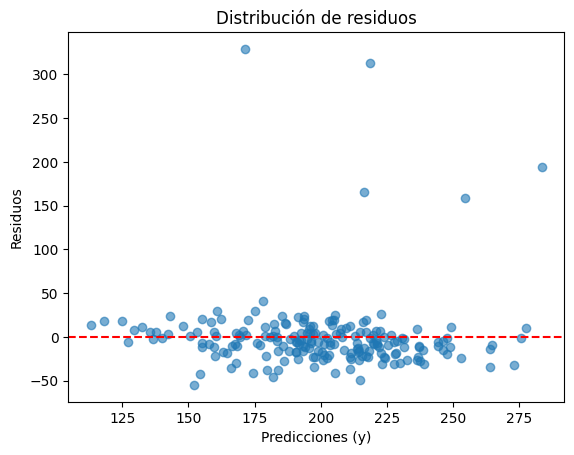

In [15]:
plt.scatter(y_pred,residuos,alpha=0.6)
plt.axhline(0, color='red',linestyle='--')
plt.xlabel('Predicciones (y)')
plt.ylabel('Residuos')
plt.title('Distribución de residuos')
plt.show()

Observe:

Do the residuals appear randomly distributed around 0?

Is there a pattern that suggests the model is not completely linear?